### Import Packages

- It is not allowed for you to use packages other than the specified packages below

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Task 1. Logistic Regression [15 points]

#### 1.1 Load Dataset [1 point]

- Load the csv file,'final_shuffled_breast_cancer100.csv' as `df`


In [2]:
# Load the csv file,'final_shuffled_breast_cancer100.csv' as df
df = pd.read_csv("final_shuffled_breast_cancer100.csv")

#### 1.2 Split the independent variable set and the target variable set [2 points]
- Assign `X` to the independent variable dataset
- Assign `y` to the target variable dataset

In [3]:
X = df.drop("target", axis =1)
y = df["target"]

#### 1.3 Split Dataset into the train & testset [2 points]
** When you use scikit-learn method to split the train & test set : 
- the `random_state` value has to be zero.
- the ratio of train set and test set is as follows : 75% train set / 25% test set
- Assign the variable names as follow : `X_train`, `X_test`, `y_train`, `y_test`

In [4]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 0)

#### 1.4 Standirdize the dataset by "StandardScaler" method of scikit-learn [4 points]
- Use the method as the default state
- Fit the `StandardScaler` on your training data only, then standardize both training and test sets using that scaler. The reason we fit a scaler on training set is to avoid possible information leakage from the test dataset. Test dataset should always remain "Unseen" until the testing phase. Thus, we should always scale using the training set.

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 1.5 Load and train a logistic regression model by scikit-learn. [2 points]
- Intercept term should be included for training
- Assign LogisticRegression as `model`

In [6]:
model = LogisticRegression()
model.fit(X_train,y_train);

#### 1.6. Print the coefficient & intercept of your model [2 points]

In [7]:
print(model.coef_)

[[-0.63330582 -0.38463901 -0.62188958 -0.58284847 -0.0124785  -0.22911522
  -0.36758627 -0.49012322  0.30941314  0.01812234 -0.23837422  0.4929945
  -0.19928741 -0.31225956  0.33192808 -0.01874974  0.03158852  0.19551406
   0.19597145 -0.02103781 -0.68210684 -0.5961599  -0.63460298 -0.57103766
  -0.3021311  -0.44437018 -0.51058829 -0.4010555  -0.36812328 -0.44266915]]


In [8]:
print(model.intercept_)

[0.13838155]


#### 1.7 Predict and evaluate the model on your test set [2 points]

[1 point]
- Predict class labels of the test set using the trained model (Deterministic Label)
- Print the predicted labels of test set and assign it to `y_pred`

In [9]:
# print the predicted labels of test set
y_pred = model.predict(X_test)
print(y_pred)

[1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 0.]


[1 point]
- Evaluate the trained model using 'accuracy_score' metric on the test set.
(Evaluate how well the predicted label of the test set matches the actual correct answer value.)
- Print the accuracy score value
(the 'accuracy_score' method has been already imported.)

In [10]:
# print the accuracy score on your test set
print(accuracy_score(y_test,y_pred))

0.92


## Task 2. PCA [15 points]

#### 2.1 Load PCA instance and reduce the dimension of train and test set [5 points] 

- Load the `PCA` model as the default state
- Reuse the train set standardized with the `StandardScaler` as the input data of the PCA.
- You should fit the PCA instance by the standardized train set. 
- Transform(train) your train data and test data by principal components created by train set.

- Reduce dimensions of train and test set from 30 to 2 dimensions

In [11]:
# fit your PCA model with your train set, and transform both train & test set by the fitted PCA
pca = PCA()
pca = pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
X_train = X_train[:,:2]
X_test = X_test[:,:2]

#### 2.2 Return the percentage of variance explained by the selected components. [3 points]

In [12]:
pca.explained_variance_ratio_[0:2]

array([0.49263364, 0.19922127])

#### 2.3 Return the accumulated  sum of percentage of variance explained by the selected components, which you calculated in Task #2.2. [2 points]

In [13]:
pca.explained_variance_ratio_[0:2].cumsum()

array([0.49263364, 0.69185491])

#### 2.4 Plot graph [5 points]
- Plot the dimensionally reduced "train data points" using the `matplotlib.pyplot` library
- The meaning of dependent variable is such as: 
-    1 : positive (breast cancer)
-    0 : negative (breast cancer)
- For label 1 and label 0, plot those labels by assigning different colors or symbols.
- Refer to the below pictures as examples (There is no need to exactly imitate the image below.)
- Recommend to use `plt.scatter` function (You are allowed to use another function as well.)

### [Hints]

##### [step 1] Make a DataFrame consisting of three columns such as 'PC1', 'PC2', 'dependent variable' which have already been made on Task No. 2.1

##### [step 2] Divide the previously created data frame into TWO DataFrames 
- A DataFrame containing only data corresponding to 'dependent variable 0'. (including 'PC1', 'PC2', 'dependent variable 0')  
- A DataFrame containing only data corresponding to 'dependent variable 1'. (including 'PC1', 'PC2', 'dependent variable 1')

##### [step 3] Draw a Scatter plot showing the PC SCOREs with different colors depending on the dependent variable.
- Use `plt.scatter' function
- Refer to the content:
https://pythonspot.com/matplotlib-scatterplot/


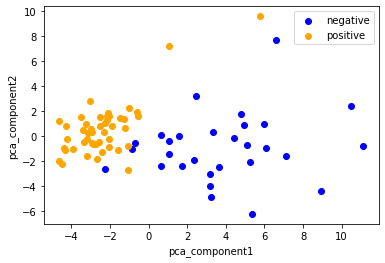

In [14]:
df = pd.DataFrame({"PC1":X_train[:,0],"PC2":X_train[:,1], "dependent variable":y_train})
df_zeros = df[df["dependent variable"]==0]
df_ones= df[df["dependent variable"]==1]
fig, ax = plt.subplots()
ax.scatter(df_zeros["PC1"],df_zeros["PC2"],c="blue", label = "negative")
ax.scatter(df_ones["PC1"],df_ones["PC2"],c="orange", label = "positive")
ax.set(xlabel="pca_component1",ylabel="pca_component2")
ax.legend()

## Task 3. Train and test another Logistic Regression model after PCA [10 points]

#### 3.1 Load another logistic regression model [5 points]
- Load the logistic regression model as `model2`
- Train the model by the dimensionally reduced train set by PCA before

In [15]:
model2 = LogisticRegression()
model2.fit(X_train,y_train)

LogisticRegression()

#### 3.2 Predict and evaluate the model on your test set¶ [3 points]
- Predict class labels of test set by using the trained model (Not probabilities) [2 points]
- Print the predicted labels of test set 

In [16]:
# print the predicted labels of test set [2 points]
y_preds = model2.predict(X_test)
print(y_preds)

[1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 0.]


- Evaluate the trained model using 'accuracy_score' metric. (the 'accuracy_score' method has been already imported.) [1 points]
- Print the accuracy score value


In [17]:
# print the accuracy score on your test set [1 points]
accuracy_score(y_test,y_preds)

0.96

#### 3.3 Analysis
- Compare the `accuracy_score` of the logistic regression model that you trained **first**(`model`) with the `accuracy_score` of the logical regression model that you trained newly **after reducing its dimension by PCA technique**(`model2`), and describe why you think the result is different. (Please describe your answer in 2-3 sentences) [2 points]

The reason we get better result is because by reducing the dimensionality, we got rid of variables that are highly correlated. As an example, in this dataset, we have ```radius error``` and ```area error```. Obviously, they depend on each other. The more the value of ```radius error``` is, the higher the value of ```area error``` is. This implies that the assumption of independent variables is violated in this dataset